In [1]:
from keras.applications import VGG16, VGG19, ResNet50, InceptionV3, Xception

Using TensorFlow backend.


In [2]:
from keras.applications import imagenet_utils

In [3]:
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.image import img_to_array,load_img

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image
%matplotlib inline

In [5]:
# define a map for memorizing the size of images used for network training
MODELS ={
    "vgg16": (VGG16, (224,224)),
    "vgg19": (VGG19, (224,224)),
    "inception": (InceptionV3, (288,299)),
    "xception": (Xception, (299,299)),
    "resnet": (ResNet50, 9224,224)
}

In [14]:
# define an auxiliary function to load & convert each image
def image_load_and_convert(image_path,model):
    pil_im =Image.open(image_path,'r')
    imshow(np.asarray(pil_im))
    
    inputShape =MODELS[model][1]
    preprocess =imagenet_utils.preprocess_input
    image =load_img(image_path,target_size=inputShape)
    image =img_to_array(image)
    #image size consistency
    image =np.expand_dims(image, axis =0)
    image =preprocess(image)
    return image

In [15]:
# define an auxiliary function for classifying image and prediction and display rank-5 predictions
def classify_image(image_path, model):
    img = image_load_and_convert(image_path,model)
    Network =MODELS[model][0]
    model =Network(weights="imagenet")
    preds =model.predict(img)
    p =imagenet_utils.decode_predictions(preds)
    #loop over the predictions and display the rank-5 predictions
    for (i,(imagenetID,label, prob)) in enumerate(p[0]):
        print("{}. {}: {:.2f}%".format(i+1, label, prob*100))

40960/35363 [==================================] - 0s 0us/step
1. papillon: 34.22%
2. Welsh_springer_spaniel: 18.58%
3. wire-haired_fox_terrier: 8.36%
4. weasel: 6.93%
5. Brittany_spaniel: 6.78%


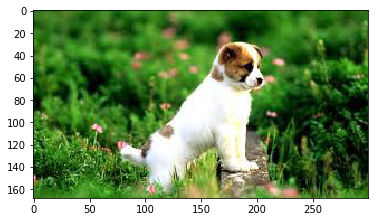

In [17]:
classify_image("dog1.jpg", "vgg16")

574717952/574710816 [==============================] - 18s 0us/step
1. Welsh_springer_spaniel: 31.47%
2. Brittany_spaniel: 20.82%
3. weasel: 6.07%
4. wire-haired_fox_terrier: 5.16%
5. Saint_Bernard: 5.10%


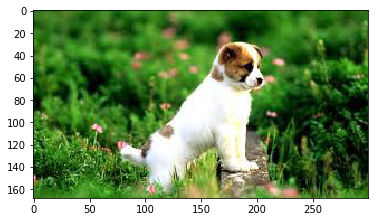

In [18]:
classify_image("dog1.jpg", "vgg19")

91889664/91884032 [==============================] - 3s 0us/step
1. military_uniform: 60.29%
2. Labrador_retriever: 16.53%
3. necklace: 10.53%
4. ping-pong_ball: 4.19%
5. cinema: 1.91%


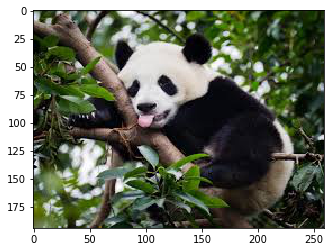

In [25]:
classify_image("panda.jpg", "xception")

1. ashcan: 100.00%
2. hammer: 0.00%
3. stole: 0.00%
4. face_powder: 0.00%
5. black_grouse: 0.00%


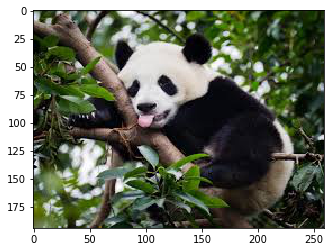

In [26]:
classify_image("panda.jpg", "inception")

1. giant_panda: 99.47%
2. indri: 0.38%
3. capuchin: 0.04%
4. lesser_panda: 0.02%
5. colobus: 0.02%


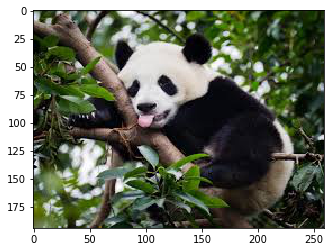

In [27]:
classify_image("panda.jpg", "vgg16")

1. space_shuttle: 100.00%
2. missile: 0.00%
3. projectile: 0.00%
4. wing: 0.00%
5. warplane: 0.00%


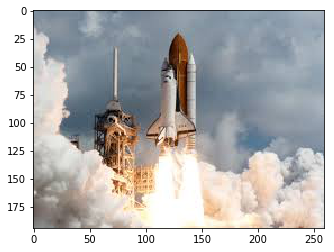

In [28]:
classify_image("space_shuttle0.jpg", "vgg16")

1. mixing_bowl: 95.76%
2. scoreboard: 4.01%
3. bib: 0.12%
4. ping-pong_ball: 0.06%
5. tripod: 0.02%


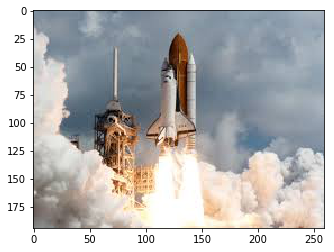

In [31]:
classify_image("space_shuttle0.jpg", "xception")

1. web_site: 98.78%
2. pitcher: 1.22%
3. binoculars: 0.00%
4. saltshaker: 0.00%
5. quilt: 0.00%


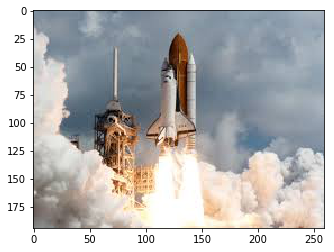

In [32]:
classify_image("space_shuttle0.jpg", "inception")

1. space_shuttle: 100.00%
2. missile: 0.00%
3. projectile: 0.00%
4. drilling_platform: 0.00%
5. airliner: 0.00%


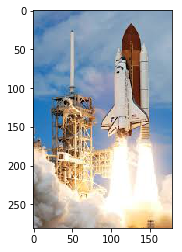

In [35]:
classify_image("space_shuttle1.jpg", "vgg19")

1. space_shuttle: 100.00%
2. missile: 0.00%
3. projectile: 0.00%
4. drilling_platform: 0.00%
5. liner: 0.00%


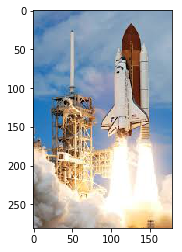

In [36]:
classify_image("space_shuttle1.jpg", "vgg16")

1. space_shuttle: 99.68%
2. radio_telescope: 0.09%
3. solar_dish: 0.07%
4. wing: 0.04%
5. airship: 0.03%


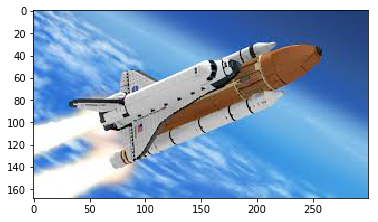

In [37]:
classify_image("space_shuttle2.jpg", "vgg16")

1. space_shuttle: 99.82%
2. wing: 0.07%
3. warplane: 0.02%
4. radio_telescope: 0.02%
5. airship: 0.02%


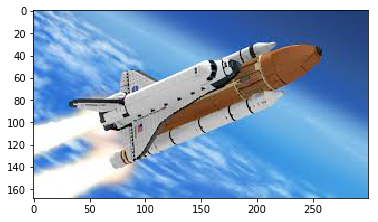

In [38]:
classify_image("space_shuttle2.jpg", "vgg19")

1. web_site: 100.00%
2. stopwatch: 0.00%
3. pitcher: 0.00%
4. binoculars: 0.00%
5. quilt: 0.00%


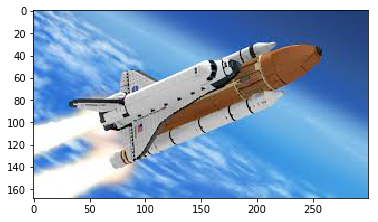

In [40]:
classify_image("space_shuttle2.jpg", "inception")

1. stole: 63.71%
2. hammer: 23.02%
3. stopwatch: 13.20%
4. paddle: 0.05%
5. flatworm: 0.01%


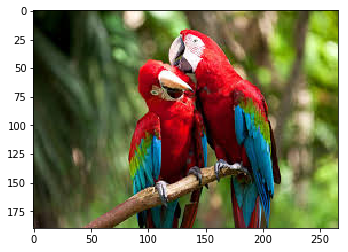

In [41]:
classify_image("bird3.jpg", "inception")

1. macaw: 100.00%
2. bee_eater: 0.00%
3. lorikeet: 0.00%
4. toucan: 0.00%
5. European_gallinule: 0.00%


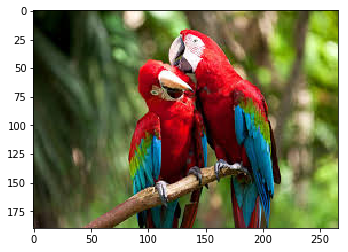

In [42]:
classify_image("bird3.jpg", "vgg16")

1. ping-pong_ball: 94.26%
2. dingo: 4.87%
3. backpack: 0.34%
4. diamondback: 0.14%
5. bottlecap: 0.11%


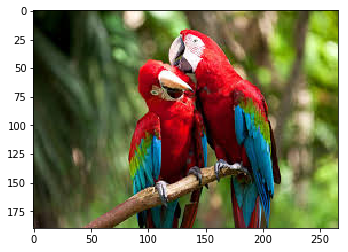

In [43]:
classify_image("bird3.jpg", "xception")